In [102]:
### load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# scikit-learn
import xgboost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Explainable AI
import shap

# 한글 폰트 설정
# plt.rcParams['font.family'] = 'NanumGothic'

In [83]:
### load example data
data = pd.read_csv('df_final.csv')

### rename data
data.columns = ["noneed", "sidocode","sidoname","sggname",
                "nbuild", "noneed2", "pyangho",
                "pwarning", "pheavy", "pwalking",
                "pstress", "pwork", "phardw",
                "rhousing", "rbuy","rfactory",
                "rgreen","noneed3","y","g"]

### remove not need column
data_use = data[data.columns.difference(['noneed','noneed2','noneed3','sidocode','sidoname','sggname',
                                         'y'])]
data_use = data_use.dropna(axis=0)

In [84]:
data_use["nbuild"] = 100000 * data_use["nbuild"]
data_use["pyangho"] = 100 * data_use["pyangho"] 

In [85]:
### train test select
X = data_use[data_use.columns.difference(['g'])]
y = data_use[["g"]]

In [86]:
# Xgboost 득점모델 학습
xgr = xgboost.XGBClassifier(random_state=0)

# Extratree 득점모델 학습
etr = ExtraTreesClassifier(random_state=0)

# 랜덤포레스트 득점모델 학습
rf = RandomForestClassifier(random_state=0)

In [87]:
### int y
y[y=="A"] = 1
y[y=="B"] = 0
y[y=="C"] = 0
y[y=="D"] = 0
y = y.astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# 학습 데이터와 훈련 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y,
                                                    shuffle = True)


In [89]:
# fitting
xgr.fit(X_train, y_train)
etr.fit(X_train, y_train)
rf.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        31
           1       0.67      0.68      0.68        38

    accuracy                           0.64        69
   macro avg       0.63      0.63      0.63        69
weighted avg       0.64      0.64      0.64        69



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix')

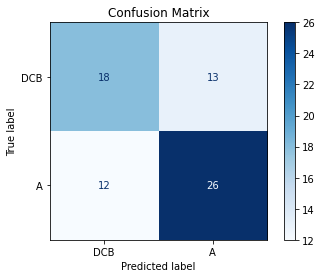

In [103]:
### confusion matrix
y_pred = xgr.predict(X_test)
print(classification_report(y_test, y_pred))

label=['DCB', 'A'] # 라벨 설정
plot = plot_confusion_matrix(xgr, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        31
           1       0.65      0.63      0.64        38

    accuracy                           0.61        69
   macro avg       0.61      0.61      0.61        69
weighted avg       0.61      0.61      0.61        69



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix')

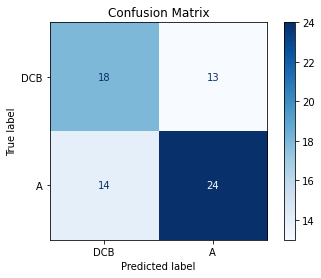

In [104]:
### confusion matrix
y_pred = etr.predict(X_test)
print(classification_report(y_test, y_pred))

label=['DCB', 'A'] # 라벨 설정
plot = plot_confusion_matrix(etr, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        31
           1       0.70      0.74      0.72        38

    accuracy                           0.68        69
   macro avg       0.68      0.67      0.68        69
weighted avg       0.68      0.68      0.68        69



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix')

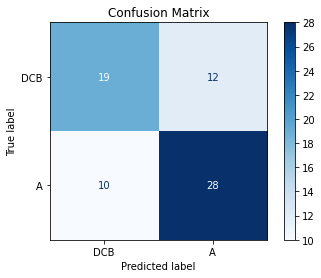

In [105]:
### confusion matrix
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

label=['DCB', 'A'] # 라벨 설정
plot = plot_confusion_matrix(rf, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

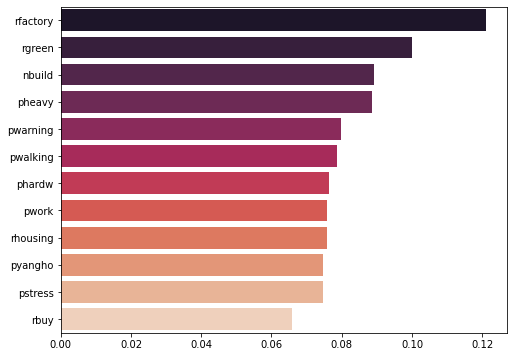

In [93]:
### Extra Tree feature importance 
%matplotlib inline
 
ftr_importances_values = etr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()


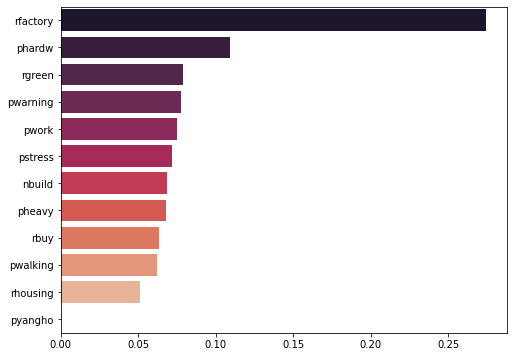

In [94]:
### XgBoost feature importance
%matplotlib inline
 
ftr_importances_values = xgr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()

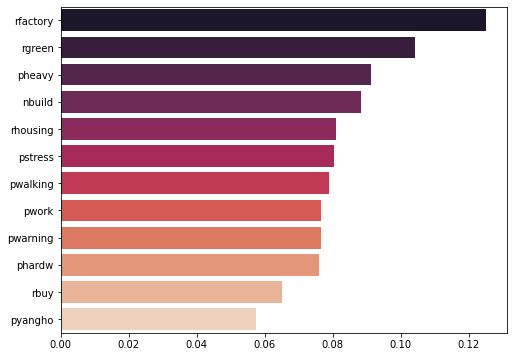

In [95]:
### Random Forest feature importance
%matplotlib inline
 
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()

In [96]:
### Xgboost
# Fits the explainer
explainer = shap.Explainer(xgr.predict, X_train)

# Calculates the SHAP values - It takes some time
shap_values_x = explainer(X_test)

Permutation explainer: 70it [00:14,  1.49it/s]


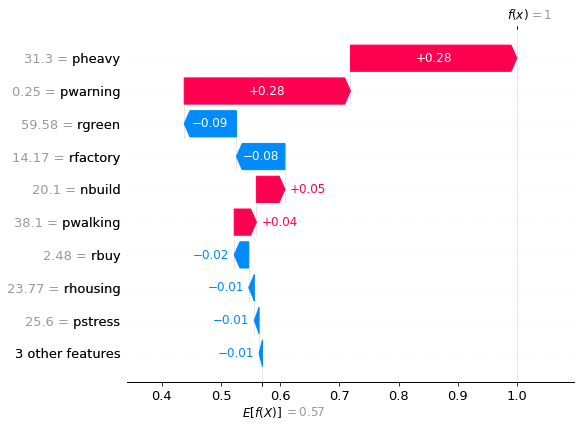

In [97]:
### plot
shap.plots.waterfall(shap_values_x[0])

In [98]:
### Extra Tree
explainer = shap.Explainer(etr.predict, X_train)

# Calculates the SHAP values - It takes some time
shap_values_e = explainer(X_test)

Permutation explainer: 70it [01:04,  1.10s/it]


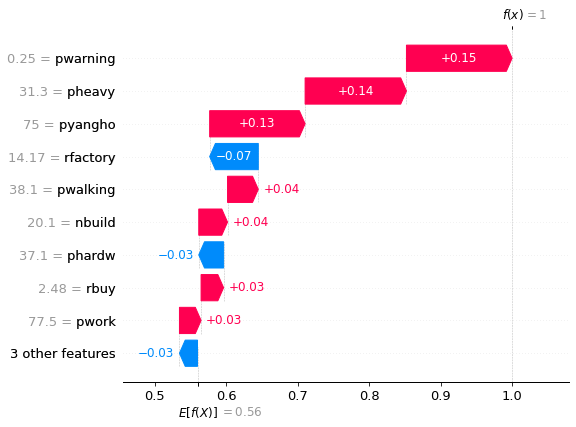

In [99]:
### plot
shap.plots.waterfall(shap_values_e[0])

In [100]:
### Random Forest
explainer = shap.Explainer(rf.predict, X_train)

# Calculates the SHAP values - It takes some time
shap_values_r = explainer(X_test)

Permutation explainer: 70it [00:50,  1.10it/s]


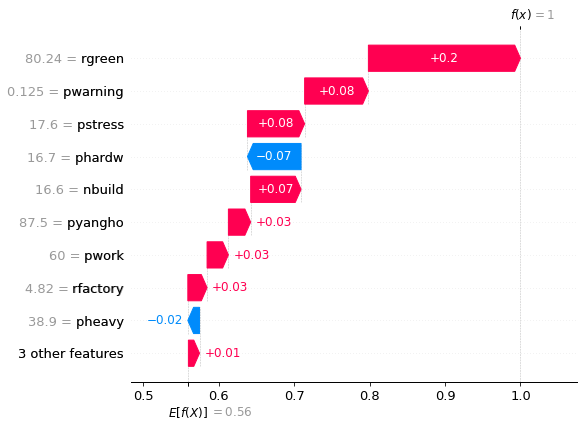

In [101]:
### plot
shap.plots.waterfall(shap_values_r[4])